In [1]:
import sys; sys.path.append("../../../utility_scripts/")
import matplotlib
from dotplot_utils import *
import pandas as pd
import seaborn as sns
sc.settings.figdir = "plots_overview/"
sc.set_figure_params(transparent=True, dpi_save=400)
# make this notebook work better with Scanpy
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys; sys.path.append("../../../utility_scripts/")
from boxplot_utils import *

---
## Read in key dataframe with sample information

In [3]:
sample_key = pd.read_csv("../../resources/visium_sample_key.csv", index_col=0)

---

In [4]:
outs = []
for s in sample_key.index:
    a = sc.read("datasets/{}_master.h5ad".format(s))
    print("Read adata from datasets/{}_master.h5ad".format(s))

    # compile training data
    outs.append(a)

assert len(outs) == len(sample_key), "Check length of outs"

Read adata from datasets/8578_4_SR00001_master.h5ad
Read adata from datasets/7319_4_HTA11_01938_master.h5ad
Read adata from datasets/8270_1_HTA11_07862_master.h5ad
Read adata from datasets/8270_2_HTA11_10711_master.h5ad
Read adata from datasets/6723_4_WD86055_master.h5ad
Read adata from datasets/7794_2_WD33468_master.h5ad
Read adata from datasets/8578_1_WD33469_master.h5ad
Read adata from datasets/8578_1_WD33473_master.h5ad
Read adata from datasets/8270_6_WD84602_master.h5ad
Read adata from datasets/8270_7_WD84602_master.h5ad
Read adata from datasets/8270_9_WD84594_master.h5ad
Read adata from datasets/8578_2_WD84594_master.h5ad
Read adata from datasets/8270_8_WD84596_master.h5ad
Read adata from datasets/8578_3_WD84596_master.h5ad
Read adata from datasets/6723_1_WD86056_master.h5ad
Read adata from datasets/6723_2_WD86056_master.h5ad
Read adata from datasets/6723_3_WD86056_master.h5ad
Read adata from datasets/7003_5_WD87480_master.h5ad
Read adata from datasets/7003_6_WD87480_master.h5ad


In [5]:
for i, x in enumerate(sample_key.index):
    outs[i].obs["Evolution"] = sample_key.loc[x, "Evolution"]

In [6]:
# concatenate anndata objects
a_comb = outs[0].concatenate(
    outs[1:],
    join="outer",
    batch_categories=list(sample_key.index),
    fill_value=0,
)
del a_comb.obsm
del a_comb.var

/home/cody/.virtualenvs/scanpy/lib/python3.8/site-packages/anndata/_core/merge.py:863: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_annot[label] = label_col
/home/cody/.virtualenvs/scanpy/lib/python3.8/site-packages/anndata/_core/merge.py:863: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_annot[label] = label_col


In [7]:
a_comb.obs["CNV_clone_domain"] = a_comb.obs["CNV clone"].values
a_comb.obs["CNV_clone_domain"] = a_comb.obs["CNV_clone_domain"].astype(str)
a_comb.obs.loc[a_comb.obs["CNV clone"].isin(["1", "2", "3", "1A", "1B"]), "CNV_clone_domain"] = "Tumor"
a_comb.obs["CNV_clone_domain"].replace({"S":"Stroma","E":"Edge"}, inplace=True)
a_comb.obs["CNV_clone_domain"] = a_comb.obs["CNV_clone_domain"].astype("category")

/tmp/ipykernel_1306233/3177586705.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_comb.obs["CNV_clone_domain"] = a_comb.obs["CNV clone"].values


In [8]:
a_comb.obs["Evolution_grouped"] = a_comb.obs["Evolution"].values
a_comb.obs["Evolution_grouped"] = a_comb.obs["Evolution_grouped"].astype(str)
a_comb.obs.loc[a_comb.obs["Evolution"].isin(["B", "N"]), "Evolution_grouped"] = "N/B"
a_comb.obs["Evolution_grouped"] = a_comb.obs["Evolution_grouped"].astype("category")

/tmp/ipykernel_1306233/798736498.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_comb.obs["Evolution_grouped"] = a_comb.obs["Evolution"].values


In [9]:
sample_key.loc[sample_key.tumor_type=="SSL/HP","CIN Status"] = "HM"

In [10]:
CIN_PATs = sample_key.loc[sample_key["CIN Status"].fillna("CIN+")=="CIN+","patient_name"].unique()

In [11]:
CIN_PATs

array(['SR00001', 'HTA11_07862', 'HTA11_10711', 'PAT71397', 'PAT05785',
       'PAT06439', 'PAT30884', 'PAT59600', 'PAT59667', 'PAT71662',
       'PAT73899', 'PAT74143', 'SG00003', 'SG00004', 'PAT73458',
       'SG00001', 'SG00002'], dtype=object)

In [12]:
HM_PATs = sample_key.loc[sample_key["CIN Status"].fillna("CIN+")=="HM","patient_name"].unique()

In [13]:
HM_PATs

array(['HTA11_01938', 'PAT15211', 'HTA11_06134', 'HTA11_07663',
       'HTA11_08622_A', 'HTA11_08622_B', 'PAT00222', 'PAT01586',
       'PAT01587', 'PAT33430', 'PAT40364', 'PAT54273', 'PAT59460'],
      dtype=object)

In [15]:
a_comb.obs["CIN_status"] = "CIN+"
a_comb.obs.loc[a_comb.obs.Patient.isin(HM_PATs), "CIN_status"] = "HM"
a_comb.obs.loc[a_comb.obs["Tumor Type"].isin(["SSL/HP", "TA/TVA", "NL"]), "CIN_status"] = "CIN-"
a_comb.obs.loc[(a_comb.obs["CNV clone"] == "1B") & (a_comb.obs.Patient=="PAT33430"), "CIN_status"] = "CIN+"
a_comb.obs["CIN_status"] = a_comb.obs["CIN_status"].astype("category")

In [16]:
a_comb.obs["CIN_status"].cat.categories

Index(['CIN+', 'CIN-', 'HM'], dtype='object')

In [17]:
a_comb.obs["Tumor_Type_CIN"] = a_comb.obs["Tumor Type"].astype(str)
a_comb.obs.loc[(a_comb.obs.CIN_status == "CIN+") & (a_comb.obs["Tumor Type"] == "MSI-H"), "Tumor_Type_CIN"] = "MSI-H (CIN+)"
a_comb.obs.loc[(a_comb.obs["CNV clone"] == "1B") & (a_comb.obs.Patient=="PAT33430"), "Tumor_Type_CIN"] = "MSI-H (CIN+)"
a_comb.obs.loc[(a_comb.obs.CIN_status == "HM") & (a_comb.obs["Tumor Type"] == "MSS"), "Tumor_Type_CIN"] = "MSS (HM)"
a_comb.obs["Tumor_Type_CIN"] = a_comb.obs["Tumor_Type_CIN"].astype("category")

/tmp/ipykernel_1306233/2631904979.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_comb.obs["Tumor_Type_CIN"] = a_comb.obs["Tumor Type"].astype(str)


In [18]:
a_comb.obs["Tumor_Type_CIN"].value_counts()

MSS             61967
MSI-H (CIN+)    20116
MSI-H           19692
TA/TVA           6741
SSL/HP           4108
NL               3708
MSS (HM)           93
Name: Tumor_Type_CIN, dtype: int64

In [19]:
a_comb.obs["Tumor_vs_NL"] = a_comb.obs["Tumor Type"].astype(str)
a_comb.obs.loc[a_comb.obs["Tumor Type"].isin(["MSI-H","MSS"]), "Tumor_vs_NL"] = "CRC"
a_comb.obs["Tumor_vs_NL"] = a_comb.obs["Tumor_vs_NL"].astype("category")

/tmp/ipykernel_1306233/261657036.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_comb.obs["Tumor_vs_NL"] = a_comb.obs["Tumor Type"].astype(str)


In [20]:
a_comb.obs["Tumor_vs_NL"].value_counts()

CRC       101868
TA/TVA      6741
SSL/HP      4108
NL          3708
Name: Tumor_vs_NL, dtype: int64

---
## Rename things and set up for plotting

In [21]:
# rename obs columns with MxIF stains in them
old_mxif = list(a_comb.obs.columns[a_comb.obs.columns.str.endswith("_MxIF")])
new_mxif = list(a_comb.obs.columns[a_comb.obs.columns.str.endswith("_MxIF")].str.split("_").str[0])
a_comb.obs.rename(columns=dict(zip(old_mxif,new_mxif)), inplace=True)

In [22]:
# rename cell state columns in master anndata.obs
et = list(a_comb.obs.columns[a_comb.obs.columns.str.endswith("_VUMCrefNMF30")])
et_new = [x.replace("_VUMCrefNMF30", "") for x in et]
a_comb.obs.rename(columns=dict(zip(et, et_new)), inplace=True)

In [23]:
a_comb

AnnData object with n_obs × n_vars = 116425 × 19469
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Gender', 'Ethnicity', 'pathology_annotation', 'CytoTRACE', 'A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem', 'Tumor Stage', 'Tumor Grade', 'cnv_leiden', 'CNV score', 'CNV clone', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metaplasia', 'Bacterial response', 'iCMS2_Up', 'iCMS2_Down', 'iCMS3_Up', 'iCMS3_Down', 'Proliferation', 'Translation', 'Neutrophils', 'RSC', 'CBC', 'T cell exhaustion', 'B cell', 'NK cell', 'Plasma cell', 'T reg resting', 'T reg suppressive', 'T reg tissue homing', 'T reg cytokines', 'T reg activation', 'TH1', 'TH2', 'TH17', 'TRM', 'M1', 'M2', 'Costimulatory MYE', 'Stimulatory DCs', 'IFN stimulated MYE', 'EMT', 'Senescence', 'SASP', 'IFN stimulated EPI', 'Stress response', 'Fibrosis', 'T cell', 'Myeloid', 'Stroma', 'T

In [24]:
cmap_dict = {
    # Tumor Type
    'SSL/HP':"#c4a4e1",'MSI-H':"#7a4fa3",'MSS':"#ffc101",'TA/TVA':"#fee799",'NL':"#1f77b4",
    "MSI-H (CIN+)":"#7a4fa3", 'MSS (HM)':"#ffc101",
    # Tumor Location
    "Cecum":"#1f4e79","Ascending":"#2e74b7","Hepatic Flexure":"#bdd6ef","Transverse":"#ff717a","Descending":"#fe0001","Sigmoid":"#c00101",
    # this one's global
    "nan":"#ffffff",
    # These are black and white for T and F
    "T":"#000000","F":"#ffffff",
    # evolution
    "N":"tab:blue","B":"tab:green","L":"tab:orange","N/B":"tab:blue",
    # CNV clone domain
    "Tumor":"#000000","Stroma":"tab:pink","Edge":"tab:red",
    "CRC":"#ffffff",
}
stage_colordict = dict(zip(["AD","I","II","III/IV"], sns.color_palette("Reds", len(["AD","I","II","III/IV"])).as_hex()))
grade_colordict = dict(zip(["G1","G2","G3"], sns.color_palette("Reds", len(["G1","G2","G3"])).as_hex()))
CIN_colordict = dict(zip(["HM","CIN-","CIN+"], sns.color_palette("Reds", len(["HM","CIN-","CIN+"])).as_hex()))
cmap_dict = {**cmap_dict, **stage_colordict, **grade_colordict, **CIN_colordict}

In [25]:
patient_colordict = dict(zip(sample_key.patient_name, [cmap_dict[x] for x in sample_key.tumor_type]))

In [26]:
cmap = matplotlib.cm.get_cmap("plasma", 8)
mw_colordict = dict(zip(["D0","D1","D2","D3","D4","D5","D6","D7"], [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]))

---

In [27]:
a_comb_epi = a_comb[~a_comb.obs["CNV clone"].isin(["S"]),:].copy()

In [28]:
a_comb_epi.obs["Tumor Type"] = a_comb_epi.obs["Tumor Type"].astype("category")
a_comb_epi.obs["Tumor Type"].cat.reorder_categories(["MSI-H","MSS","NL","SSL/HP","TA/TVA"])

AAACAAGTATCTCCCA-1-8578_4_SR00001       NL
AAACAGGGTCTATATT-1-8578_4_SR00001       NL
AAACCCGAACGAAATC-1-8578_4_SR00001       NL
AAACCGTTCGTCCAGG-1-8578_4_SR00001       NL
AAACGCTGGGCACGAC-1-8578_4_SR00001       NL
                                     ...  
TTGTATCACACAGAAT-1-8899_4_SG00002    MSI-H
TTGTGGCCCTGACAGT-1-8899_4_SG00002    MSI-H
TTGTTCAGTGTGCTAC-1-8899_4_SG00002    MSI-H
TTGTTGTGTGTCAAGA-1-8899_4_SG00002    MSI-H
TTGTTTGTGTAAATTC-1-8899_4_SG00002    MSI-H
Name: Tumor Type, Length: 53192, dtype: category
Categories (5, object): ['MSI-H', 'MSS', 'NL', 'SSL/HP', 'TA/TVA']

Saving ImSig boxplots for Tumor Type


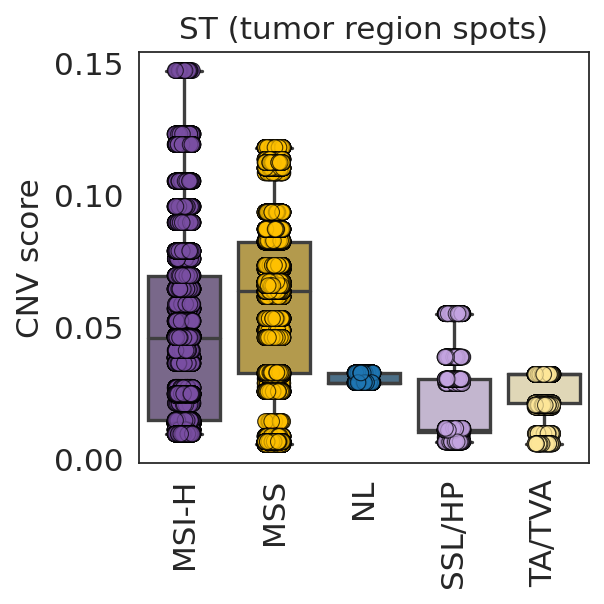

In [29]:
boxplots_group(
    a_comb_epi,
    outdir="infercnv/",
    obs=["Tumor Type"],
    colors=["CNV score"],
    figsize=(4,4),
    sig=False,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

Saving ImSig boxplots for Tumor Type


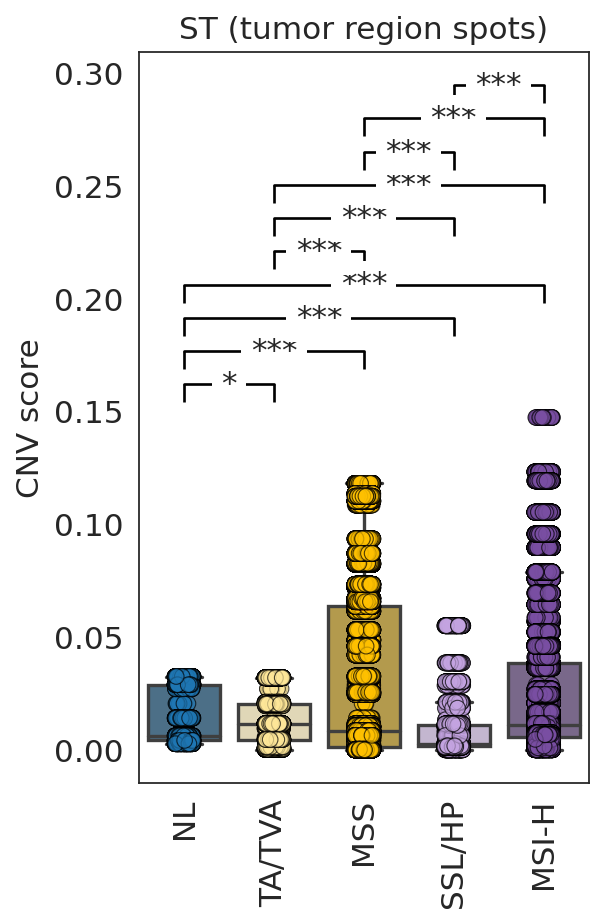

In [30]:
boxplots_group(
    a_comb,
    outdir="infercnv/",
    obs=["Tumor Type"],
    colors=["CNV score"],
    figsize=(4,6),
    sig=True,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

In [31]:
a_comb_epi.obs["Tumor Type"].value_counts()

MSS       31096
MSI-H     17343
TA/TVA     1951
SSL/HP     1735
NL         1067
Name: Tumor Type, dtype: int64

In [32]:
a_comb_epi.obs["Tumor_Type_CIN"] = a_comb_epi.obs["Tumor_Type_CIN"].cat.reorder_categories(
    ["NL","SSL/HP","TA/TVA","MSS (HM)","MSI-H","MSS","MSI-H (CIN+)"]
)

Saving ImSig boxplots for Tumor_Type_CIN


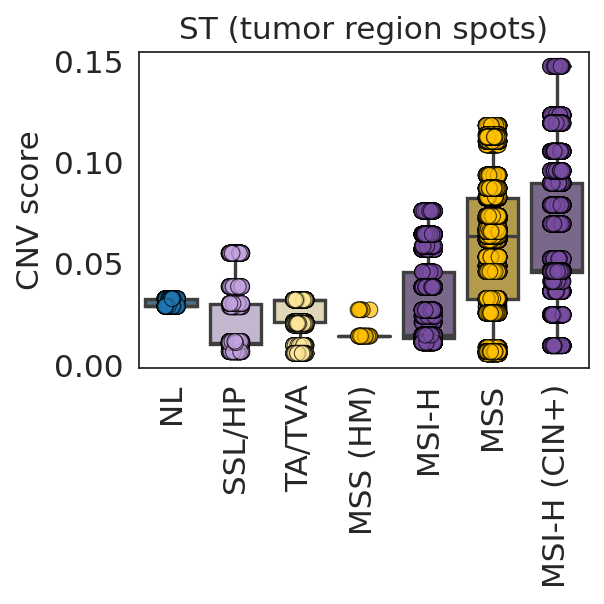

In [33]:
boxplots_group(
    a_comb_epi,
    outdir="infercnv/",
    obs=["Tumor_Type_CIN"],
    colors=["CNV score"],
    figsize=(4,4),
    sig=False,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

In [34]:
a_comb_epi.obs.Tumor_Type_CIN.value_counts()

MSS             31064
MSI-H (CIN+)     9062
MSI-H            8281
TA/TVA           1951
SSL/HP           1735
NL               1067
MSS (HM)           32
Name: Tumor_Type_CIN, dtype: int64

In [35]:
a_comb_epi.obs["CIN_status"] = a_comb_epi.obs["CIN_status"].cat.reorder_categories(
    ["CIN-","HM","CIN+"]
)

Saving ImSig boxplots for CIN_status


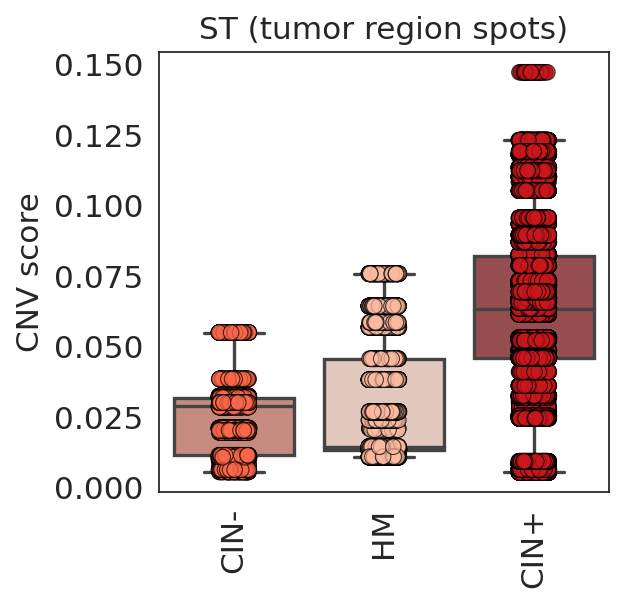

In [36]:
boxplots_group(
    a_comb_epi,
    outdir="infercnv/",
    obs=["CIN_status"],
    colors=["CNV score"],
    figsize=(4,4),
    sig=False,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

In [37]:
a_comb_epi.obs.CIN_status.value_counts()

CIN+    40126
HM       8313
CIN-     4753
Name: CIN_status, dtype: int64

In [38]:
a_comb_epi.obs["Tumor_vs_NL"].cat.categories

Index(['CRC', 'NL', 'SSL/HP', 'TA/TVA'], dtype='object')

Saving ImSig boxplots for Tumor_vs_NL


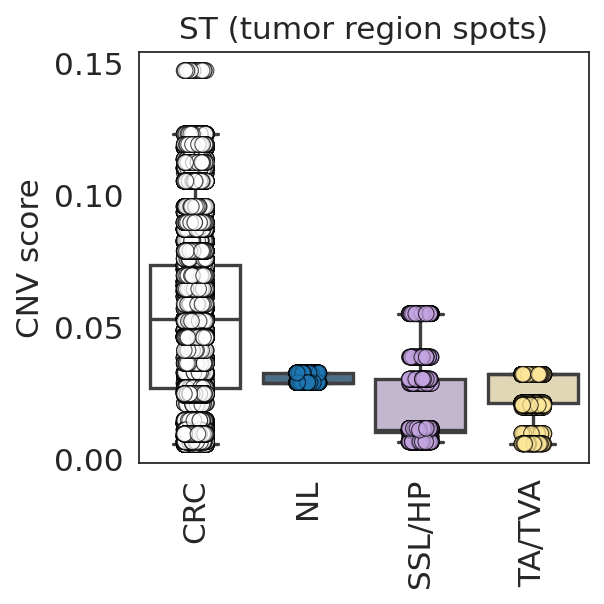

In [39]:
boxplots_group(
    a_comb_epi,
    outdir="infercnv/",
    obs=["Tumor_vs_NL"],
    colors=["CNV score"],
    figsize=(4,4),
    sig=False,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

Saving ImSig boxplots for Tumor_vs_NL


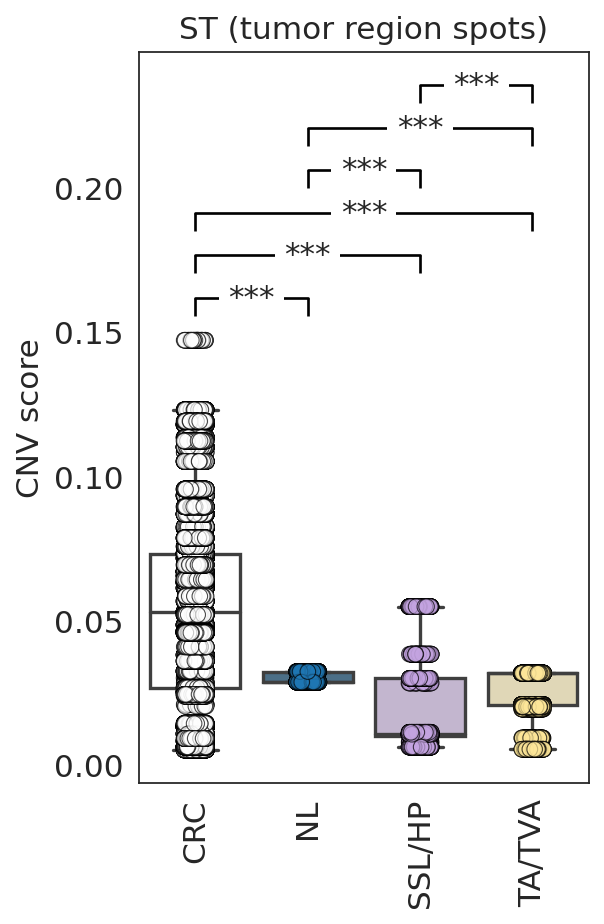

In [40]:
boxplots_group(
    a_comb_epi,
    outdir="infercnv/",
    obs=["Tumor_vs_NL"],
    colors=["CNV score"],
    figsize=(4,6),
    sig=True,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

In [41]:
a_comb_epi.obs.Tumor_vs_NL.value_counts()

CRC       48439
TA/TVA     1951
SSL/HP     1735
NL         1067
Name: Tumor_vs_NL, dtype: int64

Saving ImSig boxplots for Evolution


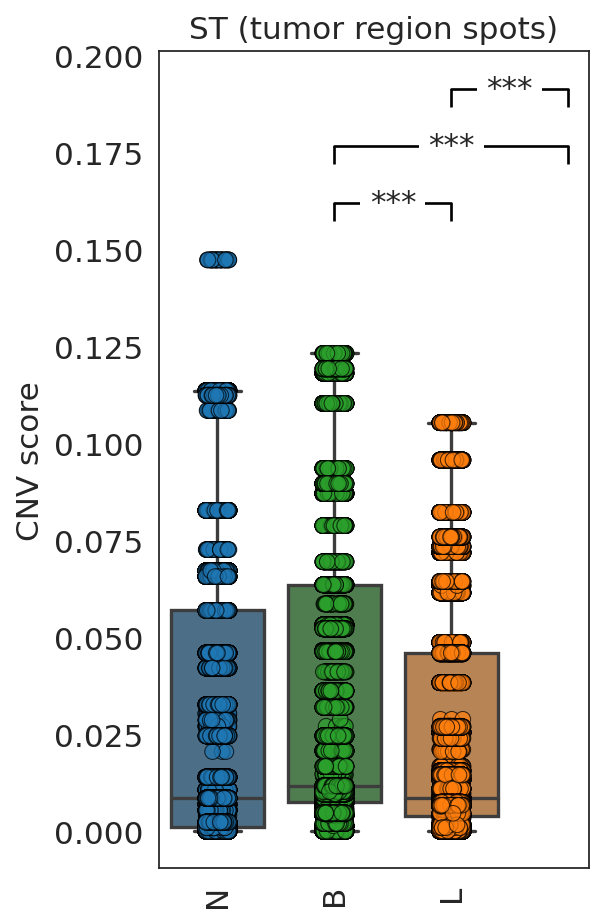

In [42]:
boxplots_group(
    a_comb,
    outdir="infercnv/",
    obs=["Evolution"],
    colors=["CNV score"],
    figsize=(4,6),
    sig=True,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)

Saving ImSig boxplots for Evolution_grouped


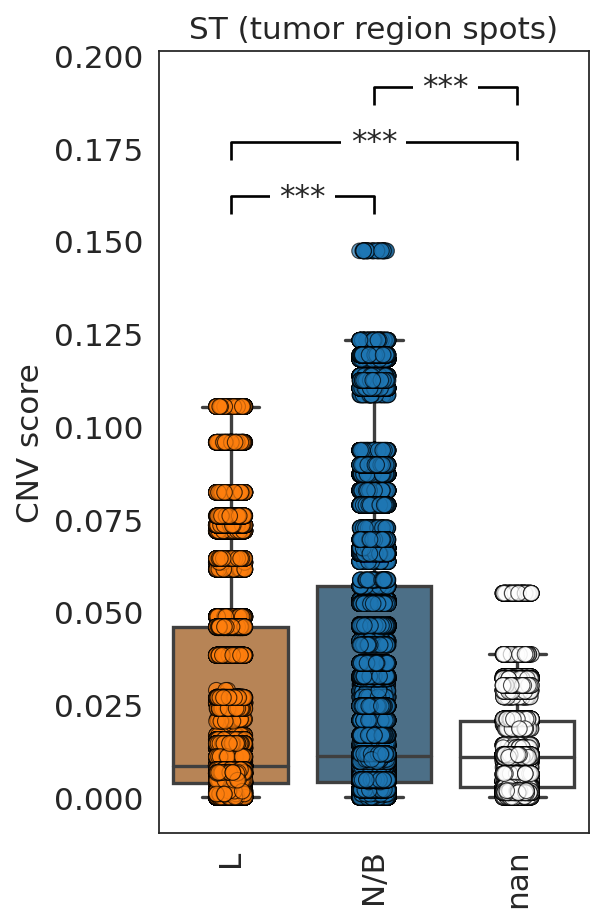

In [43]:
boxplots_group(
    a_comb,
    outdir="infercnv/",
    obs=["Evolution_grouped"],
    colors=["CNV score"],
    figsize=(4,6),
    sig=True,
    cmap_dict=cmap_dict,
    titles=["ST (tumor region spots)"],
)